<a href="https://colab.research.google.com/github/AtharvaJ-236/Data-Science/blob/main/Linear_regression_DS_Pract_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fifa_world_cup_matches.csv to Fifa_world_cup_matches.csv


In [2]:
import pandas as pd

df = pd.read_csv("/content/Fifa_world_cup_matches.csv")

# Convert percentage columns
percent_cols = ['possession team1', 'possession team2', 'possession in contest']

for col in percent_cols:
    df[col] = df[col].str.replace('%','').astype(float)

# 1 = team1 wins, 0 = team1 loses or draws
df['Win'] = (df['number of goals team1'] > df['number of goals team2']).astype(int)

# Selecting Features
feature_cols = [
    'possession team1','possession team2','possession in contest',
    'number of goals team1','number of goals team2',
    'total attempts team1','total attempts team2',
    'on target attempts team1','on target attempts team2',
    'off target attempts team1','off target attempts team2',
    'passes team1','passes team2',
    'passes completed team1','passes completed team2',
    'corners team1','corners team2',
    'free kicks team1','free kicks team2',
    'forced turnovers team1','forced turnovers team2'
]

X = df[feature_cols]
y = df['Win']

print(X.head())
print(y.head())

   possession team1  possession team2  possession in contest  \
0              42.0              50.0                    8.0   
1              72.0              19.0                    9.0   
2              44.0              45.0                   11.0   
3              51.0              39.0                   10.0   
4              64.0              24.0                   12.0   

   number of goals team1  number of goals team2  total attempts team1  \
0                      0                      2                     5   
1                      6                      2                    13   
2                      0                      2                    14   
3                      1                      1                     6   
4                      1                      2                    14   

   total attempts team2  on target attempts team1  on target attempts team2  \
0                     6                         0                         3   
1                 

In [3]:
# Splitting Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [5]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)
print("Predicted results:", y_pred)

Predicted results: [1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0]


In [6]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix) # Confusion Matrix

[[7 2]
 [2 5]]


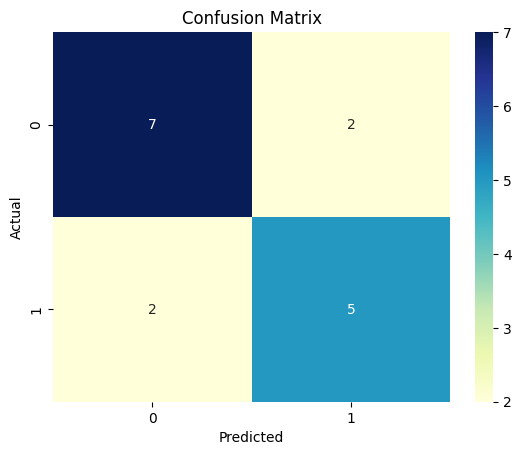

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [8]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.75
Precision: 0.7142857142857143
Recall: 0.7142857142857143


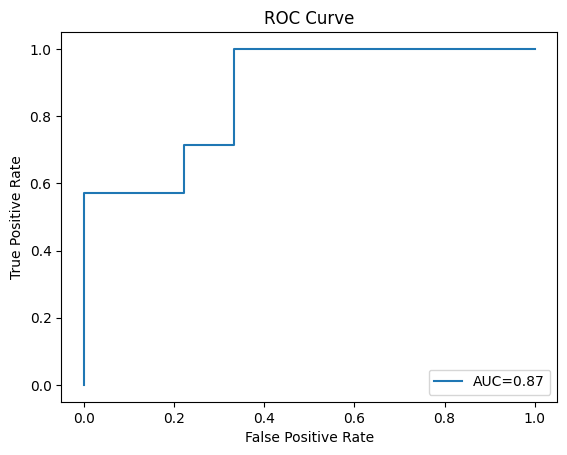

In [9]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC=" + str(round(auc, 2)))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()